# Import libraries



In [ ]:
!pip install split-folders
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-5x0vpz5n
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-5x0vpz5n
  Resolved https://github.com/tensorflow/docs to commit 60abeb06e500fa5edbbac374fc0d8142c8322aef
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2023.10.27.81990-py3-none-any.whl size=184144 sha256=b4cf1f1fd3806fc605ab38dc2da3bc6d8ca07a6ac18e5ce504a87d1c9ea97f6c
  Stored in directory: /tmp/pip-ephem-wheel-cache-t609s10g/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


In [ ]:
# import requirement libraries and tools
import os
import pathlib
import itertools
import splitfolders
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns




In [ ]:
# To enable dynamic memory allocation, run the following commands
# at the start of the session :
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1793: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


# Import Dataset


In [ ]:
!unzip archive.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/Rice_Image_Dataset'

In [ ]:
data_images=[]
data_labels=[]
for i in os.listdir(data_path):
    full_path=os.path.join(data_path+i)
    if(os.path.isdir(full_path)):
        for rice_image in os.listdir(full_path):
            data_images.append(full_path+"/"+rice_image)
            data_labels.append(i)

In [ ]:
df=pd.DataFrame({"label":data_labels,"image":data_images})
df.head()

,label,image
0,Arborio,DeepLearning/Rice_Image_Dataset/Arborio/Arbori...
1,Arborio,DeepLearning/Rice_Image_Dataset/Arborio/Arbori...
2,Arborio,DeepLearning/Rice_Image_Dataset/Arborio/Arbori...
3,Arborio,DeepLearning/Rice_Image_Dataset/Arborio/Arbori...
4,Arborio,DeepLearning/Rice_Image_Dataset/Arborio/Arbori...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   75000 non-null  object
 1   image   75000 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [ ]:
df.nunique()

label        5
image    75000
dtype: int64

In [ ]:
df_num=df.value_counts(subset="label").reset_index()
df_num.columns= ['label','count']
df_num

,label,count
0,Arborio,15000
1,Basmati,15000
2,Ipsala,15000
3,Jasmine,15000
4,Karacadag,15000


In [ ]:
df_num.head()

,label,0
0,Arborio,15000
1,Basmati,15000
2,Ipsala,15000
3,Jasmine,15000
4,Karacadag,15000


# Diagrama de barras

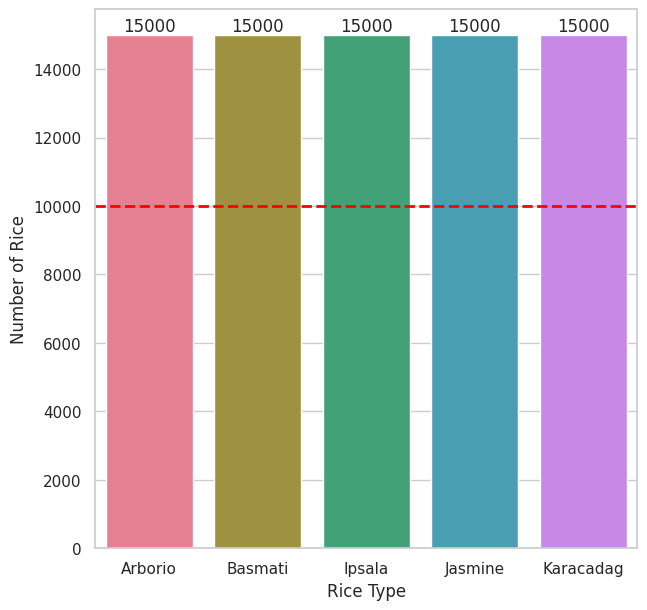

In [ ]:
plt.figure(figsize=(7,7))

sns.set_theme(style="whitegrid")
ax=sns.barplot(data=df_num, x="label",y="count",palette="husl",saturation=0.75)
plt.axhline(y=10000, color='red', linestyle='--', linewidth=2)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xlabel("Rice Type")
plt.ylabel("Number of Rice")
plt.show()

# Images Visualitation

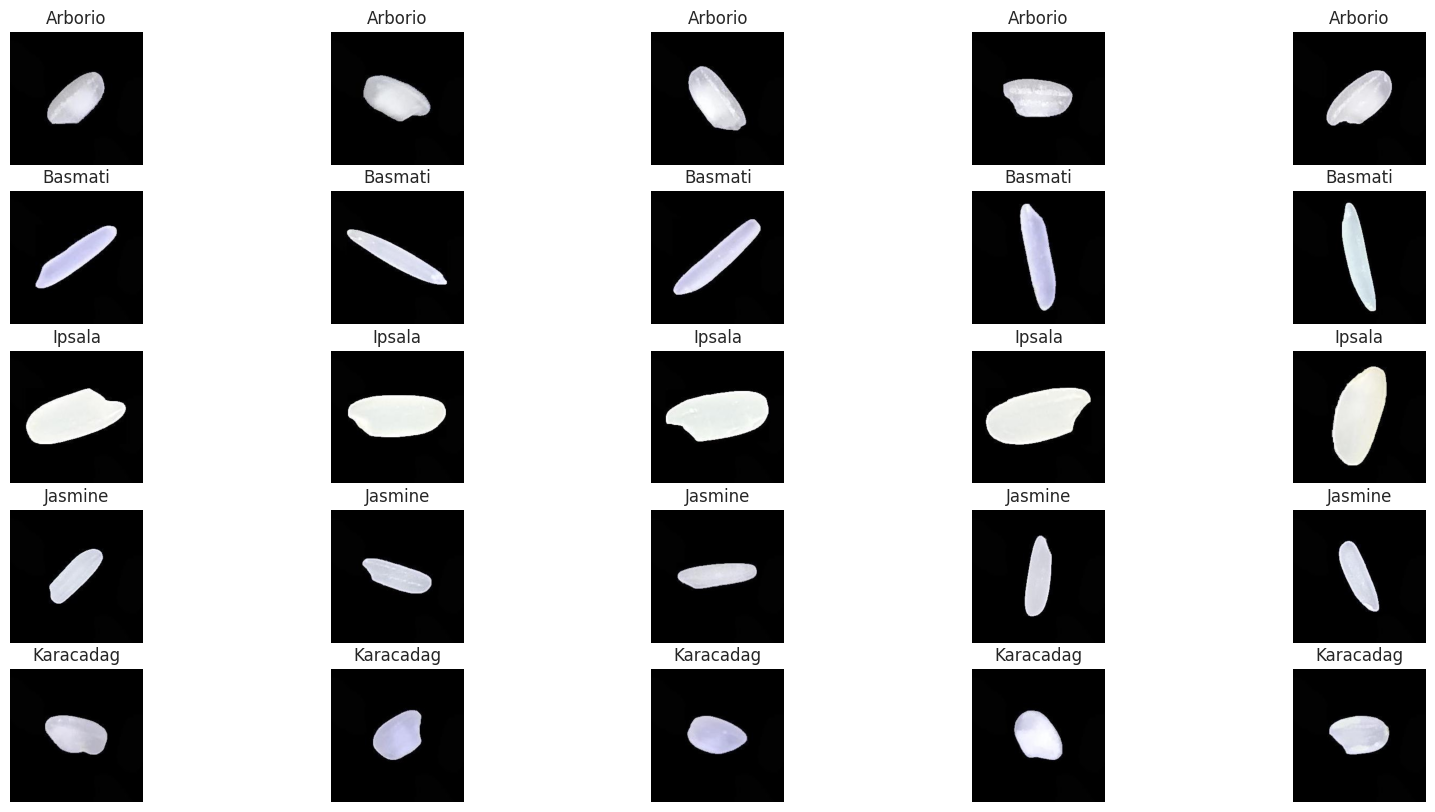

In [ ]:
import keras.utils as image
fig=plt.figure(figsize=(20,10))
count=0
for j in range(5):
    for i in range(5):
        ax=fig.add_subplot(5,5,j*5+1+i,xticks=[],yticks=[])

        plt.title(df_num["label"].iloc[j])
        all_files=os.listdir(data_path+df_num["label"].iloc[j])
        plt.axis("off")

        first_image_name=all_files[i]
        ax.imshow(image.load_img(data_path+df_num["label"].iloc[j]+"/"+first_image_name))

plt.show()